# Описание проекта

Горнодобывающая компания разрабатывает решение для предсказания коэффициента восстановления золота из золотосодержащей руды.
Чтобы оптимизировать производство необходимо проанализировать имеющиеся данные с параметрами добычи и очистки руды и на полученных данных построить модель предсказания. Основные задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# 1. Подготовка данных

### 1.1. Ознакомление с данными

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [25]:
display(gold_train.head(1))
gold_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [26]:
display(gold_test.head(1))
gold_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [27]:
display(gold_full.head(1))
gold_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [28]:
gold_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

### 1.2. Эффективность обогощения
Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

Формула рассчета Обогощения:

recovery = C * (F - T) / (F * (C - T))  * 100%

    C — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.

In [29]:
rougher_c = gold_train['rougher.output.concentrate_au']
rougher_f = gold_train['rougher.input.feed_au']
rougher_t = gold_train['rougher.output.tail_au']

In [30]:
gold_train['rougher.output.recovery_prep'] = rougher_c *(rougher_f-rougher_t) / (rougher_f*(rougher_c-rougher_t)) * 100

In [31]:
gold_train[['rougher.output.recovery', 'rougher.output.recovery_prep']].head(5)

,rougher.output.recovery,rougher.output.recovery_prep
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [32]:
#В данных много пропусков и нулей, предобработку выполним позднее, поэтому посчитаем МАЕ вручную:
mae_rougher = (gold_train['rougher.output.recovery'] - gold_train['rougher.output.recovery_prep']).abs().mean()
print("MAE между данными и расчетами:", mae_rougher)

MAE между данными и расчетами: 9.444891926100695e-15


### Вывод

Средняя абсолютная ошибка минимальна (9.5e-15), значит эффективность обогащения рассчитана правильно.

### 1.3. Признаки в тестовой выборке
Проанализируем признаки, недоступные в тестовой выборке.

In [33]:
#Данные, которые отстуствуют в тестовой выборке:
dif_list = list(gold_train)
for i in list(gold_train):
    if i in list(gold_test):
        dif_list.remove(i)

In [34]:
dif_list

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### Вывод:

В тестовой выборке недоступны параметры продуктов после процессов, т.е. имеются только "первичные" данные.

### 1.4. Предобработка данных 

Проведем предобработку данных:

In [35]:
def pretreatment(df):
    new_df = df.fillna(method='ffill').drop('date', axis=1).drop_duplicates()
    return new_df

In [36]:
gold_train = pretreatment(gold_train)
gold_test = pretreatment(gold_test)
gold_full = pretreatment(gold_full)

In [37]:
print(gold_train.shape, gold_test.shape, gold_full.shape)

(16839, 87) (5848, 52) (22687, 86)


### Вывод

В исходных данных заполнили пропуски соседними значениями (данные распределены по времени, поэтому "соседние" данные схожи и такой способ заполнения возможен). После чего удалили столбец с датой и дубликаты.

# 2. Анализ данных

### 2.1. Концентрация металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [38]:
def concentrat(metall):
    median = round(gold_full.filter(regex="concentrate_"+metall).median(), 1)
    print("концентрация после:\nфлотации -> первичной очистки -> вторичной очистки:")
    print(median[2], median[1], median[0], sep=" -> ")
    print("\nРост в процентах:")
    print("start", round(((median[1]-median[2])/median[2]) *100 , 1), 
      round((median[0]-median[2])/median[2] *100,1), sep=" -> ")

In [39]:
print("Золото\n")
concentrat('au')

Золото

концентрация после:
флотации -> первичной очистки -> вторичной очистки:
20.0 -> 32.3 -> 44.6

Рост в процентах:
start -> 61.5 -> 123.0


In [40]:
gold_full['rougher.input.feed_au'].median()

7.880279386106403

In [41]:
print("Серебро\n")
concentrat('ag')

Серебро

концентрация после:
флотации -> первичной очистки -> вторичной очистки:
11.8 -> 8.3 -> 5.0

Рост в процентах:
start -> -29.7 -> -57.6


In [42]:
print("Свинец\n")
concentrat('pb')

Свинец

концентрация после:
флотации -> первичной очистки -> вторичной очистки:
7.6 -> 9.9 -> 9.9

Рост в процентах:
start -> 30.3 -> 30.3


In [43]:
#приведение данных к годным для построения графика
bar_au = gold_full.filter(regex="concentrate_au").median()
bar_au = pd.DataFrame({'stage':bar_au.index, 'concentration':bar_au.values}).sort_values(by='concentration', ascending=True)
bar_au.loc[0,'stage'] = 'после 2 очистки'
bar_au.loc[1,'stage'] = 'после 1 очистки'
bar_au.loc[2,'stage'] = 'после флотации'
bar_ag = gold_full.filter(regex="concentrate_ag").median()
bar_ag = pd.DataFrame({'stage':bar_ag.index, 'concentration':bar_ag.values}).sort_values(by='concentration', ascending=False)
bar_pb = gold_full.filter(regex="concentrate_pb").median()
bar_pb = pd.DataFrame({'stage':bar_pb.index, 'concentration':bar_pb.values}).sort_values(by='concentration', ascending=True)

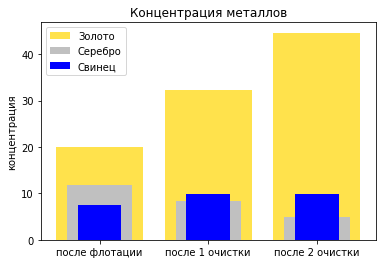

In [44]:
#Построение графика
plt.bar(bar_au['stage'], bar_au['concentration'], alpha=0.7, label="Золото", color='gold')
plt.bar(bar_au['stage'], bar_ag['concentration'], label="Серебро", color='silver', width = 0.6)
plt.bar(bar_au['stage'], bar_pb['concentration'], label="Свинец", color='blue', width = 0.4)
plt.legend()
plt.title('Концентрация металлов')
plt.ylabel("концентрация")
plt.show()

### Вывод

Концентрация золота с каждым последующим этапом растет (на 60%, относительно первоначальной), концентрация серебра - наоборот уменьшается (на 30%), концентрация свинца после флотации увеличилась, однако последующие очистки на нее не повлияли.

### 2.2. Размер гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [45]:
#Выделим столбец с размером гранул и посмотрим распределение

#size_train = gold_train.filter(regex="rougher.input.feed")
size_train = gold_train["rougher.input.feed_size"]
size_test = gold_test["rougher.input.feed_size"]
size_full = gold_full["rougher.input.feed_size"]

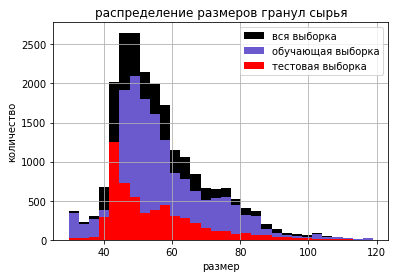

In [46]:
#Для масштаба
Q1 = size_train.describe()['25%']
Q3 = size_train.describe()['75%']
IQR = Q3 - Q1
range1 = Q1-1*IQR
range2 = Q3+3*IQR

size_full.hist(bins = 30, range = (range1,range2), label='вся выборка', color='k')
size_train.hist(bins = 30, range = (range1,range2), label='обучающая выборка', color='slateblue')
size_test.hist(bins = 30, range = (range1,range2), label='тестовая выборка', color='r')
plt.legend()
plt.title('распределение размеров гранул сырья')
plt.ylabel("количество")
plt.xlabel("размер")
plt.show()

### Вывод
Распределения на тестовой и обучающей выборке отличаются не существенно, оба распределения напоминают Распределение Пуассона с небольшим вторым пиком. Оценка модели должна быть правильной.

### 2.3 Суммарная концентрация

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Найдем аномальные значения в суммарном распределении. Определим, стоит ли их удалять из обеих выборок?

In [47]:
#выделим нужные столбцы
sum_conc_train_start = gold_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']]
sum_conc_train_roug = gold_train.filter(regex="rougher.output.concentrate")
sum_conc_train_primary = gold_train.filter(regex="primary_cleaner.output.concentrate")
sum_conc_train_secondary = gold_train.filter(regex="final.output.concentrate")

In [48]:
#проверим:
sum_conc_train_roug.head(1)

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,11.500771,7.101074,28.029297,19.793808


In [49]:
#Просуммируем все столбцы и запишем данные в новый столбец sum:
sum_conc_train_start['sum'] = sum_conc_train_start.iloc[:,:].sum(1)
sum_conc_train_roug['sum'] = sum_conc_train_roug.iloc[:,:].sum(1)
sum_conc_train_primary['sum'] = sum_conc_train_primary.iloc[:,:].sum(1)
sum_conc_train_secondary['sum'] = sum_conc_train_secondary.iloc[:,:].sum(1)
sum_conc_train_roug.head(3)

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,sum
0,11.500771,7.101074,28.029297,19.793808,66.424950
1,11.615865,7.278807,28.067063,20.050975,67.012710
2,11.695753,7.216833,27.454037,19.737170,66.103793


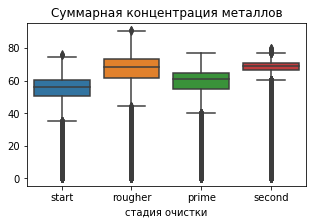

In [50]:
#Создадим отдельный ДФ для удобства анализа:
box_df2 = pd.DataFrame()
box_df2['start'] = sum_conc_train_start['sum']
box_df2['rougher'] = sum_conc_train_roug['sum']
box_df2['prime'] = sum_conc_train_primary['sum']
box_df2['second'] = sum_conc_train_secondary['sum']

#Построим ящики с усами:
plt.figure(figsize=(5,3))
ax = sns.boxplot(data=box_df2)
plt.title('Суммарная концентрация металлов')
plt.xlabel("стадия очистки")
plt.show()

In [51]:
#Аналогично рассмотрим данные по всей выборке:
sum_conc_train_start = gold_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']]
sum_conc_full_roug = gold_full.filter(regex="rougher.output.concentrate")
sum_conc_full_primary = gold_full.filter(regex="primary_cleaner.output.concentrate")
sum_conc_full_secondary = gold_full.filter(regex="final.output.concentrate")
sum_conc_train_start['sum'] = sum_conc_train_start.iloc[:,:].sum(1)
sum_conc_full_roug['sum'] = sum_conc_full_roug.iloc[:,:].sum(1)
sum_conc_full_primary['sum'] = sum_conc_full_primary.iloc[:,:].sum(1)
sum_conc_full_secondary['sum'] = sum_conc_full_secondary.iloc[:,:].sum(1)

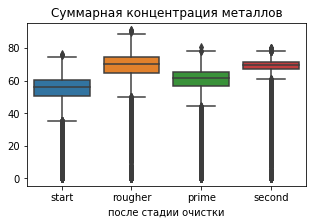

In [52]:
box_df3 = pd.DataFrame()
box_df3['start'] = sum_conc_train_start['sum']
box_df3['rougher'] = sum_conc_full_roug['sum']
box_df3['prime'] = sum_conc_full_primary['sum']
box_df3['second'] = sum_conc_full_secondary['sum']
plt.figure(figsize=(5,3))
ax = sns.boxplot(data=box_df3)
plt.title('Суммарная концентрация металлов')
plt.xlabel("после стадии очистки")
plt.show()

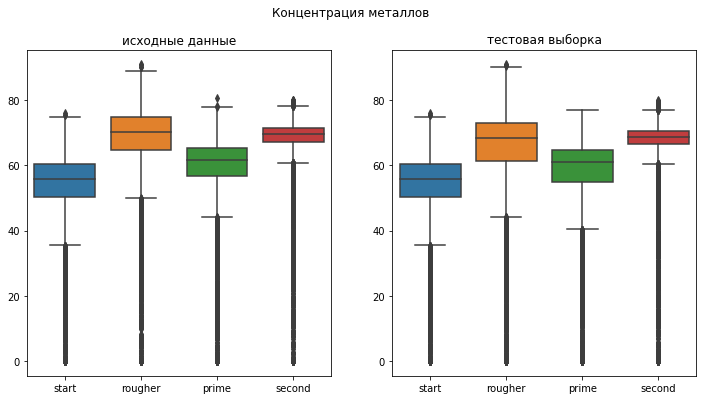

In [53]:
#сравним:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
ax1 = sns.boxplot(data=box_df2, ax=axes[1])
ax2 = sns.boxplot(data=box_df3, ax=axes[0])
ax1.title.set_text('тестовая выборка')
ax2.title.set_text('исходные данные')
plt.suptitle('Концентрация металлов')
plt.show()

Распределения в исходных данных и тестовой выборке схожи. Достаточно много выбросов < Q1, которые следует удалить.

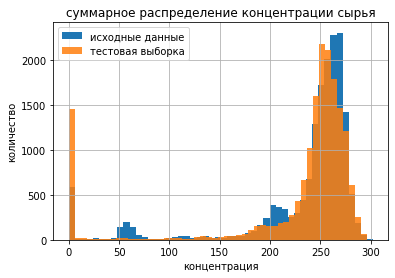

In [54]:
#Посмотрим детальнее на распределение концентраций:
box_df3.iloc[:,:].sum(1).hist(bins = 50,  label='исходные данные')
box_df2.iloc[:,:].sum(1).hist(bins = 50, alpha=0.85, label='тестовая выборка')
plt.legend()
plt.title('суммарное распределение концентрации сырья')
plt.ylabel("количество")
plt.xlabel("концентрация")
plt.show()

Видим очевидный "аппендикс" в районе нулевого значения концентрации. Нужно удалить из данных аномальную "пустую" породу.

In [33]:
# box_df = (sum_conc_train_roug, sum_conc_train_primary, sum_conc_train_secondary)
# for df in box_df:
#     Q1 = df['sum'].describe()['25%']
#     Q3 = df['sum'].describe()['75%']
#     IQR = Q3 - Q1
#     range1 = Q1-1.6*IQR
#     range2 = Q3+3*IQR
#     plt.figure()
#     plt.xlim(range1, range2)
#     sns.boxplot(df['sum'])
#     plt.title('Концентрация металлов после этапа ' + list(df)[1].partition('.')[0])
#     plt.xlabel("концентрация")
#     plt.show()

In [55]:
#Создадим новый фрейм с "достоверными" данными обучающей выборки
gold_train_trust = pd.DataFrame
gold_train_trust = gold_train
print("Количество исходных данных:", gold_train_trust.shape)

Количество исходных данных: (16839, 87)


In [56]:
#Находим выбросы (значения вне диапозона range1-tange2)
outliers = []
box_df = (sum_conc_train_start, sum_conc_train_roug, sum_conc_train_primary, sum_conc_train_secondary)
for df in box_df:
    Q1 = df['sum'].describe()['25%']
    Q3 = df['sum'].describe()['75%']
    IQR = Q3 - Q1
    range1 = Q1-3*IQR
    range2 = Q3+3*IQR
    quer = df.query('@range1 > sum' or 'sum > @range2')
    outliers.append(quer.index) #индексы выбросов

In [57]:
#Int64Index to list
out_all=[]
for i in range(len(outliers)):
    outliers[i] = outliers[i].tolist()
    out_all = out_all+outliers[i]

print("Уникальных выбросов:", len(list(set(out_all))))

Уникальных выбросов: 3021


In [58]:
gold_train_trust = gold_train_trust.drop(list(set(out_all)), axis='rows')
print("Осталось значений:", gold_train_trust.shape)

Осталось значений: (13818, 87)


В результате анализа данных из обучающей выборки было удалено 3600 записей, содержащих аномальные значения, больщую часть которых содержали нулевые значения.

In [59]:
#Отдельно рассмотрим rougher.input.feed на тестовой и обучающей выборках
feed_test = gold_test[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']]
feed_train = gold_train[['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']]

In [60]:
feed_test['sum'] = feed_test.iloc[:,:].sum(1)
feed_train['sum'] = feed_train.iloc[:,:].sum(1)

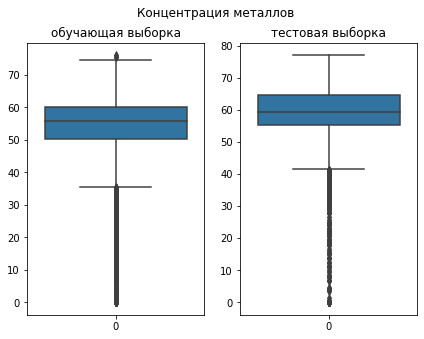

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(7,5))
ax1 = sns.boxplot(data=feed_test['sum'], ax=axes[1])
ax2 = sns.boxplot(data=feed_train['sum'], ax=axes[0])
ax1.title.set_text('тестовая выборка')
ax2.title.set_text('обучающая выборка')
plt.suptitle('Концентрация металлов')
plt.show()

Снова большое количество выбросов < Q1. Избавимся и от них.

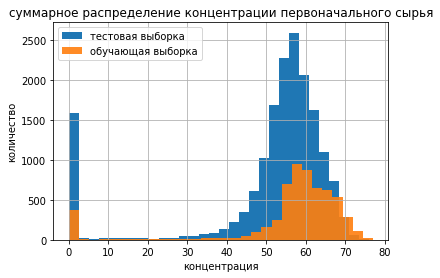

In [62]:
feed_train['sum'].hist(bins = 30, label='тестовая выборка')
feed_test['sum'].hist(bins = 30, alpha=0.9, label='обучающая выборка')
plt.legend()
plt.title('суммарное распределение концентрации первоначального сырья')
plt.ylabel("количество")
plt.xlabel("концентрация")
plt.show()

Ситуация аналогична. 

In [63]:
#Определяем выбросы
outliers2 = []
Q1 = feed_test['sum'].describe()['25%']
Q3 = feed_test['sum'].describe()['75%']
IQR = Q3 - Q1
range1 = Q1-3*IQR
range2 = Q3+3*IQR
quer = feed_test.query('@range1 > sum' or 'sum > @range2')
outliers2.append(quer.index)

In [64]:
#Не получилось сразу удалить нужные индексы, поэтому конвертирую в список
#Int64Index to list
out_all2=[]
for i in range(len(outliers2)):
    outliers2[i] = outliers2[i].tolist()
    out_all2 = out_all2+outliers2[i]

print("Уникальных выбросов:", len(list(set(out_all2))))

Уникальных выбросов: 426


In [65]:
#Обучающую выборку уже отфильтровали, поэтому удаляем только из тестовой
gold_test_trust = gold_test
gold_test_trust = gold_test_trust.drop(list(set(out_all2)), axis='rows')
print("Осталось значений:", gold_test_trust.shape)

Осталось значений: (5422, 52)


### Вывод

Определили изменение конценрации различных металлов на различных этапах очистки: растет только концентрация золота.

Сравнили распределения размеров гранул на обучающей и тестовой выборке: размеры схожи, поэтому модель должна предсказывать верно.

Определили аномлаьные значения и выбросы суммарных объемов металлов на разных стадиях очистки и удалили эти данные из тестовой и обучающей выборок.

# 3. Модель

### 3.1. sMAPE

Напишем функцию для вычисления итоговой sMAPE.

In [66]:
# #gold_train_trust - обучающая выборка без выбросов
features_train = gold_train_trust.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = gold_train_trust[['rougher.output.recovery', 'final.output.recovery']]

In [67]:
#определяем признаки
features_train = features_train.reset_index().drop(['index'], axis=1)
target_train = target_train.reset_index().drop(['index'], axis=1)

In [68]:
#избавляемся от аномалий
features_train = features_train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [69]:
features_full = gold_full.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_full = gold_full[['rougher.output.recovery', 'final.output.recovery']]

In [70]:
model_lr = LinearRegression() #Взяли простую модель без параметров
model_lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
predictions = model_lr.predict(features_full)

In [72]:
target_full['final_predict'] = predictions[:,1]
target_full['rougher_predict'] = predictions[:,0]

In [73]:
target_full.head(3)

,rougher.output.recovery,final.output.recovery,final_predict,rougher_predict
0,87.107763,70.541216,70.765434,88.798013
1,86.843261,69.266198,69.367688,88.397502
2,86.842308,68.116445,68.533924,88.809596


smape = 1/n * SUM ( (true - predict) / (0.5*(true+predict)) * 100% )

smape_final = 0.25 * smape.roug + 0.75 * smape.final


In [74]:
#необязательный этап, забивающий память, но уменьшит имена переменных:
true_roug = target_full['rougher.output.recovery']
pred_roug = target_full['rougher_predict']
true_final = target_full['final.output.recovery']
pred_final = target_full['final_predict']

In [75]:
#функция sMAPE:
def smape(true, pred):
    total = (abs(true - pred)*2 / (abs(true) + abs(pred)) *100).mean()
    return total

In [76]:
#применяем функцию и черновому и финальному этапам:
smape_final = smape(true_final, pred_final)
smape_roug = smape(true_roug, pred_roug)

In [77]:
print("sMAPE rougher:", smape_roug)
print("sMAPE final:", smape_final)

sMAPE rougher: 12.956539721556965
sMAPE final: 8.446678933303192


In [78]:
#рассчитываем итоговое sMAPE:
smape_total = 0.25 * smape_roug + 0.75 * smape_final
print("Итоговое sMAPE =", round(smape_total,1))

Итоговое sMAPE = 9.6


### 3.2. Модели

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

In [79]:
#Оставим в обучающей выборке только те признаки, которые есть в тестовой:
features_train_model = gold_train_trust[list(gold_test)].reset_index().drop(['index'], axis=1)
features_train_model.head(1)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.91214,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


In [80]:
#Возьмем целевые признаки тестовой выборки из всей:
target_test = gold_full[['rougher.output.recovery', 'final.output.recovery']].loc[gold_test_trust.index].dropna().reset_index(drop=True)
features_test = gold_test_trust.loc[target_test.index].reset_index(drop=True)
target_test.head(1)

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216


In [81]:
print("Лес")
for estim in range(3,25,7):
    print("\nКоличество деревьев:", estim)
    for depth in range(3,24,10):
        model_rfr = RandomForestRegressor(max_depth=depth, n_estimators=estim)
        print("Глубина дерева:", depth)
        final_score = cross_val_score(model_rfr, features_train_model, target_train, cv=3).sum() / 3
        print("Средняя оценка качества модели:", final_score)

Лес

Количество деревьев: 3
Глубина дерева: 3
Средняя оценка качества модели: -0.5267564329935301
Глубина дерева: 13
Средняя оценка качества модели: -1.0506837369906874
Глубина дерева: 23
Средняя оценка качества модели: -1.105335524702378

Количество деревьев: 10
Глубина дерева: 3
Средняя оценка качества модели: -0.267814743831343
Глубина дерева: 13
Средняя оценка качества модели: -0.5510916300848329
Глубина дерева: 23
Средняя оценка качества модели: -0.453789430334953

Количество деревьев: 17
Глубина дерева: 3
Средняя оценка качества модели: -0.2979717913757735
Глубина дерева: 13
Средняя оценка качества модели: -0.41638862877494226
Глубина дерева: 23
Средняя оценка качества модели: -0.4570283089522646

Количество деревьев: 24
Глубина дерева: 3
Средняя оценка качества модели: -0.30042328978361094
Глубина дерева: 13
Средняя оценка качества модели: -0.44658932265687906
Глубина дерева: 23
Средняя оценка качества модели: -0.4924889298499724


Лучший показатель (-0.24) у модели с параметрами: Количество деревьев: 10, Глубина дерева: 3.

In [82]:
print("Дерево")
for depth in range(1,30,5):
    model_dtr = DecisionTreeRegressor(max_depth=depth)
    print("Глубина дерева:", depth)
    final_score = cross_val_score(model_dtr, features_train_model, target_train, cv=3).sum() / 3
    print("Средняя оценка качества модели:", final_score)

Дерево
Глубина дерева: 1
Средняя оценка качества модели: -0.42309858665238037
Глубина дерева: 6
Средняя оценка качества модели: -0.7743015256799457
Глубина дерева: 11
Средняя оценка качества модели: -1.6387156665420122
Глубина дерева: 16
Средняя оценка качества модели: -1.6979742845795645
Глубина дерева: 21
Средняя оценка качества модели: -2.044726793713659
Глубина дерева: 26
Средняя оценка качества модели: -2.141376957977132


Лучший показатель (-0.42) у модели с глубиной дерева 1.

In [83]:
print("Линейная регрессия")
model_linr = LinearRegression()
final_score = cross_val_score(model_linr, features_train_model, target_train, cv=3).sum() / 3
print("Средняя оценка качества модели:", final_score)

Линейная регрессия
Средняя оценка качества модели: -0.9073395899803031


У линейной регрессии показатель равен -0.9.

In [84]:
#сравним с обучаемой на всех столбцах:
model_test = LinearRegression()
final_score = cross_val_score(model_test, features_train, target_train, cv=3).sum() / 3
final_score

0.5404653180130562

Поскольку мы обучали модель только на "первоначальных" данных, то метрики моделей крайне низкие. Лучшая метрика -0.24 у Леса с 10 деревьями и глубиной 3, в то время как у модели, обучаемой на всех данных метрика = 0.54.

Проверим нашу модель на тестовой выборке:

In [85]:
#Выбираем нашу модель
model_final = RandomForestRegressor(max_depth=3, n_estimators=10)
model_final = model_final.fit(features_train_model, target_train)

In [86]:
#Подготовка тестовой выборки
features_test = features_test.dropna().reset_index(drop=True)
target_test = target_test.loc[features_test.index].reset_index(drop=True)

In [87]:
predict_final = model_final.predict(features_test)
smape_pred_fin = smape(target_test, predict_final)

In [88]:
def smape_total(roug, final):
    smape_total = 0.25 * roug + 0.75 * final
    return smape_total

In [89]:
print("sMAPE нашей модели:", smape_total(smape_pred_fin[0],smape_pred_fin[1]))

sMAPE нашей модели: 13.946727622084008


In [90]:
smape_mean = smape(target_test, target_test.mean())
print("sMAPE среднего значения:", smape_total(smape_mean[0],smape_mean[1]))

sMAPE среднего значения: 13.380118935487413


### Вывод
Поскольку мы предсказываем только на начальных данных, точность модели крайне низкая, однако если предсказывать учитывая промежуточные этапы - то точность модели значительно выше (-0.24 и 0.5 соответственно).

Или я сделал что-то не так, но я копался 2 дня по последнему пункту и так не нашел ошибки :( 

# Итоговый вывод

Были проанализированы и подготовлены данные для дальнейшего анализа, заполнены пропуски.

Проанализированы данные на каждом этапе очистики (концентрацию, размер гранул, суммарная доля металов). Были найдены аномалии и данные "очистили" от них.

Написали функцию по рассчету sMAPE и итоговое sMAPE, проанализировали несколько моделей и пришли к выводу, что для построения точной модели необходимо больше вводных данных или необходимо учитывать данные после каждой из этапов очистки.